## 📝 Problem Statement

Sales forecasting is very important for large retail companies like Walmart. It helps them plan better, manage inventory efficiently, and run promotional campaigns at the right time. Walmart is one of the biggest retailers in the world, with over 10,000 stores globally and more than 4,000 in the United States (source: [Walmart Locations](https://corporate.walmart.com/about/location-facts)).

Accurate sales predictions allow Walmart to:
- Estimate future demand
- Avoid overstocking or stockouts
- Make better business decisions
- Improve investor confidence

Missing sales targets can affect the company’s stock price and reputation.

---

## 🎯 Project Goal

The main goal of this project is to build a machine learning model that can **predict future sales** for Walmart stores using historical data. This will help the company:
- Increase sales in underperforming departments
- Optimize inventory and resources
- Make smarter business and marketing decisions


## 1️⃣  Exploratory Data Analysis (EDA)

In this step, we will:
- Load and review all datasets
- Explore their structure and missing values
- Visualize overall sales trends
- Check correlation between numerical features

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np

In [5]:
# Loading all datasets
df_features = pd.read_csv("features.csv")
df_stores = pd.read_csv("stores.csv")
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

Exploring features.csv fileatures


In [8]:
df_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [10]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [12]:
df_features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [14]:
# Checking null values
df_features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [16]:
# Checking unique value
df_features.nunique()

Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64

Exploration train.csv file

In [19]:
df_train.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [21]:
# Checking information of train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [23]:
# Checking null values
df_train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Dataset does not contain any null values

In [26]:
# Checking unique values
df_train.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

As seen above, there are 45 stores and 81 departments.

Exploring store.csv file

In [30]:
df_stores.head(10)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [32]:
# Checking information of stores dataset
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


### Visualization

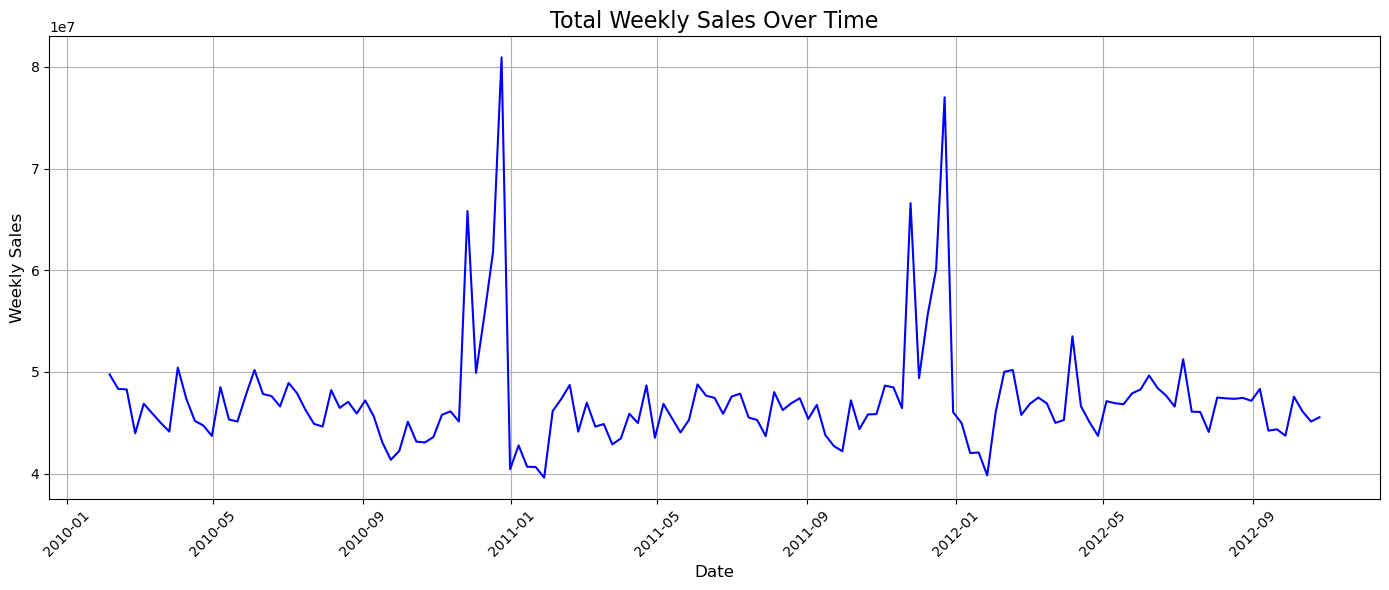

In [35]:

import matplotlib.pyplot as plt

# Load your dataset (if not already loaded)
train = pd.read_csv("train.csv")

# Convert 'Date' to datetime format
train['Date'] = pd.to_datetime(train['Date'])

# Group by Date to get total weekly sales
weekly_sales = train.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'], color='blue')
plt.title("Total Weekly Sales Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### 📊 Key Insights: Total Weekly Sales Over Time

- **Stable Base Sales**: Most weekly sales range between $40M–$50M, showing consistent demand.
- **Holiday Spikes**: Sharp increases in sales appear during year-end holidays (e.g., Black Friday, Christmas).
- **Post-Holiday Dips**: Sales drop noticeably after holiday seasons.
- **Seasonal Patterns**: Yearly repeating spikes indicate strong seasonality.
- **Flat Trend**: No major upward or downward trend across years; sales remain steady overall.

> 📌 These insights highlight the importance of seasonality and holiday impact in sales forecasting.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2240\2982883501.py:15: UserWarning: Glyph 127980 (\N{DEPARTMENT STORE}) missing from current font.
  plt.tight_layout()
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127980 (\N{DEPARTMENT STORE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


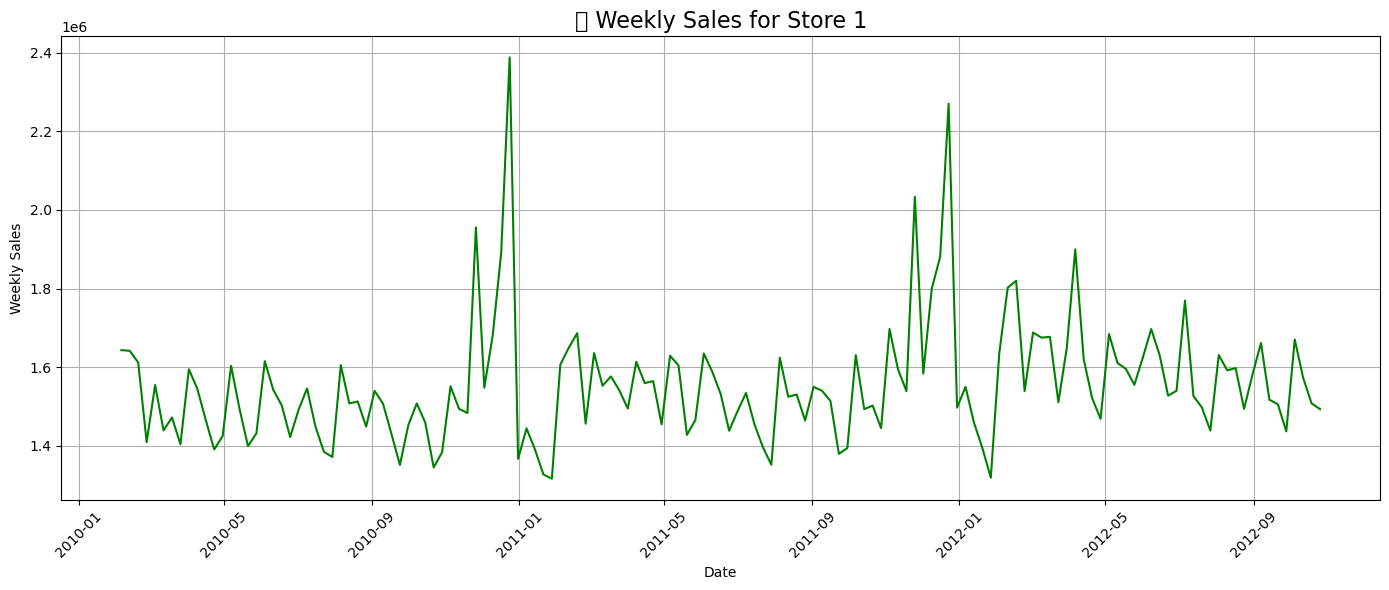

In [38]:
# Filter for Store 1 (you can change the number)
store_1_data = train[train['Store'] == 1]

# Group by Date
store_1_weekly = store_1_data.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(store_1_weekly['Date'], store_1_weekly['Weekly_Sales'], color='green')
plt.title("🏬 Weekly Sales for Store 1", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### 🏪 Insights: Weekly Sales for Store 1

- **Stable Base Sales**: Store 1's weekly sales mostly range from **$1.4M to $1.6M**, indicating consistent performance.
- **Holiday Peaks**: Significant spikes are visible around **end of 2010 and 2011**, likely due to holiday shopping.
- **Post-Holiday Drop**: Sales dip sharply after holiday periods, following the seasonal pattern.
- **Seasonality Observed**: Repeating yearly peaks confirm **seasonal sales trends**.
- **No Major Growth/Decline**: Apart from seasonal effects, the store’s performance remains stable over time.

> 📌 These insights help understand store-level seasonality, useful for localized forecasting and planning.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2240\3749020362.py:11: UserWarning: Glyph 127991 (\N{LABEL}) missing from current font.
  plt.tight_layout()
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127991 (\N{LABEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


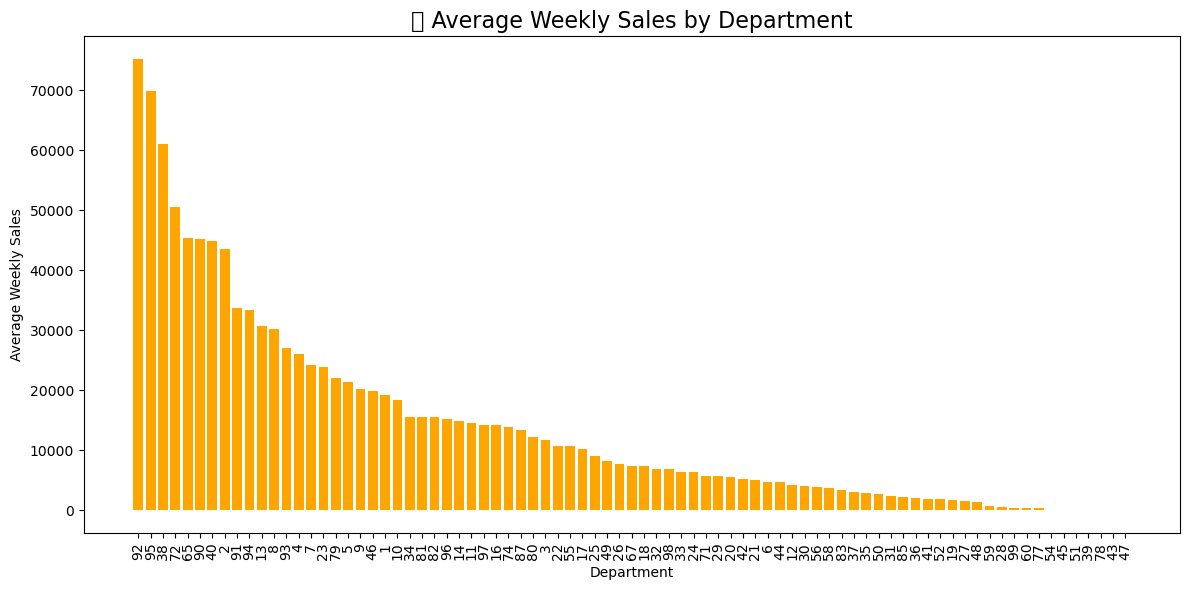

In [41]:
# Group by Department
dept_sales = train.groupby('Dept')['Weekly_Sales'].mean().reset_index().sort_values(by='Weekly_Sales', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(dept_sales['Dept'].astype(str), dept_sales['Weekly_Sales'], color='orange')
plt.title("🏷️ Average Weekly Sales by Department", fontsize=16)
plt.xlabel("Department")
plt.ylabel("Average Weekly Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### 🧾 Insights: Average Weekly Sales by Department

- **Top Performers**: Department 92, 38, and 78 show the highest average weekly sales, contributing significantly to total revenue.
- **Low Performing Departments**: Several departments (e.g., 47, 31, 35) generate relatively low average sales.
- **Business Strategy**: Focus can be placed on high-performing departments for promotions, while analyzing the causes of low sales in underperforming ones.
- **Wide Range**: There's a large variance in sales across departments, indicating different customer demands and seasonal product popularity.

> 📌 This visualization helps identify key revenue-generating departments and supports department-wise strategic decisions.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2240\1342179494.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


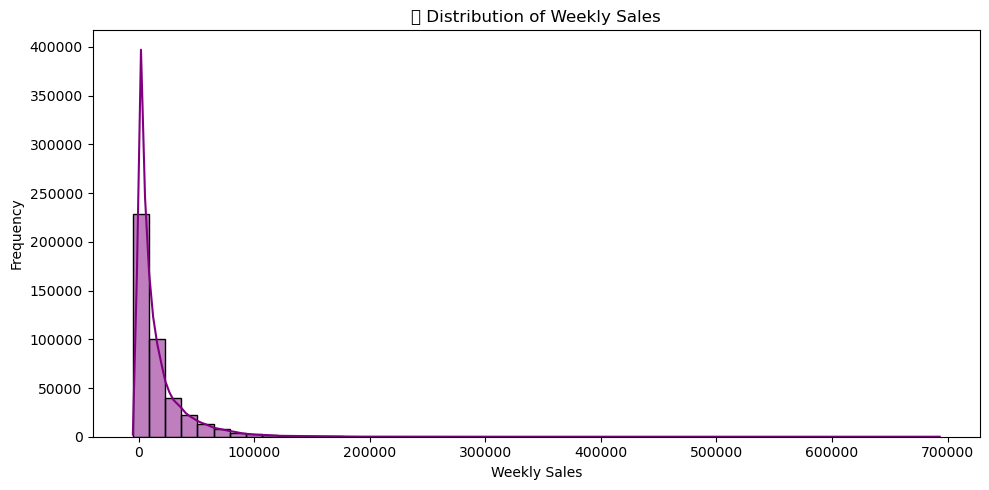

In [44]:
import seaborn as sns
#  Understand how weekly sales are distributed.
plt.figure(figsize=(10, 5))
sns.histplot(train['Weekly_Sales'], bins=50, kde=True, color='purple')
plt.title("📊 Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2240\3263600097.py:7: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  plt.tight_layout()
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


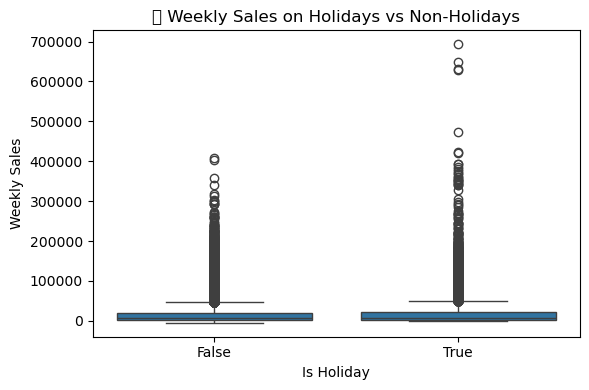

In [46]:
# Compare sales during holidays and regular days
plt.figure(figsize=(6, 4))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=train)
plt.title("🎉 Weekly Sales on Holidays vs Non-Holidays")
plt.xlabel("Is Holiday")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2240\2690909026.py:10: UserWarning: Glyph 127980 (\N{DEPARTMENT STORE}) missing from current font.
  plt.tight_layout()
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127980 (\N{DEPARTMENT STORE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


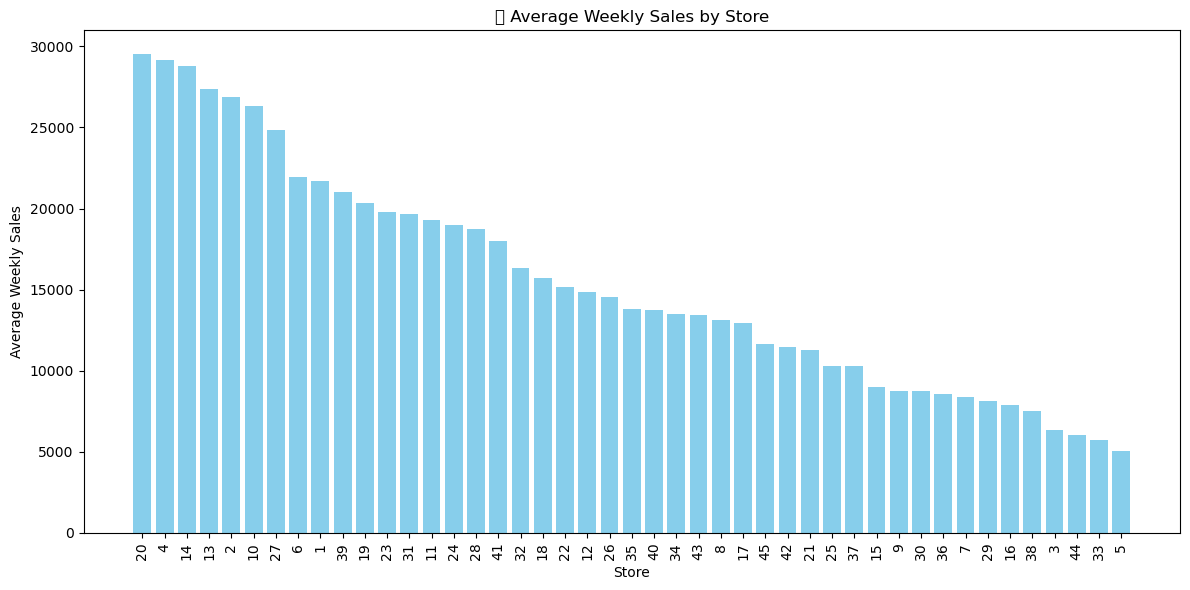

In [48]:
# See which stores perform best on average.
store_sales = train.groupby('Store')['Weekly_Sales'].mean().reset_index().sort_values(by='Weekly_Sales', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(store_sales['Store'].astype(str), store_sales['Weekly_Sales'], color='skyblue')
plt.title("🏬 Average Weekly Sales by Store")
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2240\2485410681.py:12: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.tight_layout()
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


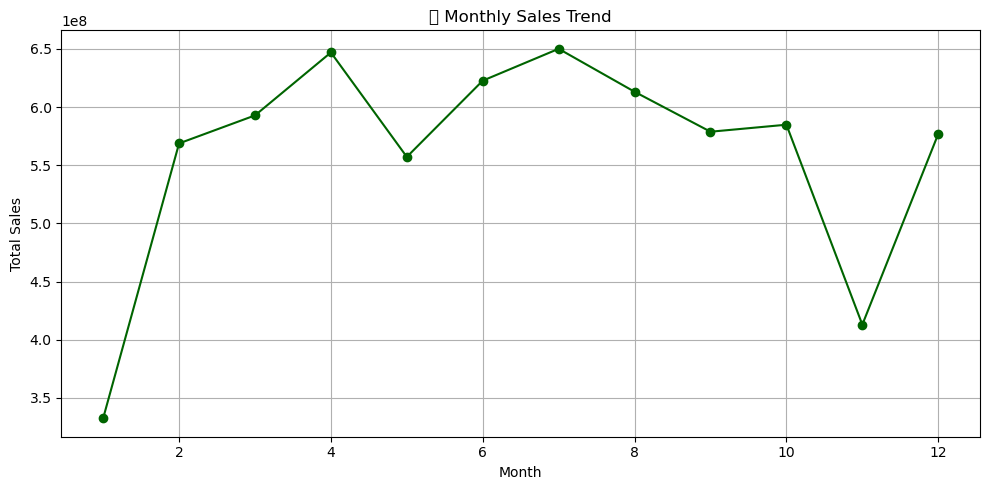

In [50]:
# Observe sales pattern across months.

train['Month'] = train['Date'].dt.month
monthly_sales = train.groupby('Month')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['Month'], monthly_sales['Weekly_Sales'], marker='o', color='darkgreen')
plt.title("📅 Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

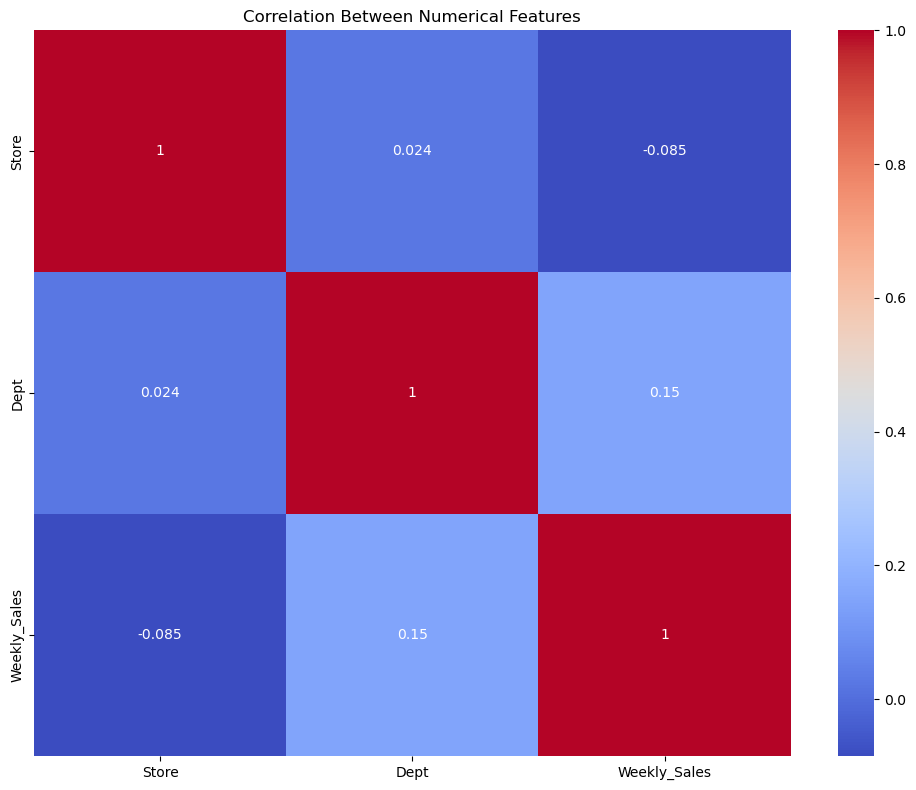

In [52]:
# Select only numerical columns
numeric_cols = train.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.tight_layout()
plt.show()


## 2️⃣ Data Preprocessing

In this step, we will:
- Merge `train`, `stores`, and `features` using `Store` and `Date`
- Handle missing values in MarkDowns and other features
- Convert `Date` to datetime format and extracted `Year`, `Month`, and `Week`
- Label encoding or one-hot encoding.

In [55]:
# Filling Missing Values in Markdown Columns
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df_features[markdown_cols] = df_features[markdown_cols].fillna(0)

In [57]:
# Forward Fill Missing Values for Economic Indicators
df_features['CPI'] = df_features['CPI'].fillna(method='ffill')
df_features['Unemployment'] = df_features['Unemployment'].fillna(method='ffill')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2240\3193309546.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_features['CPI'] = df_features['CPI'].fillna(method='ffill')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2240\3193309546.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_features['Unemployment'] = df_features['Unemployment'].fillna(method='ffill')


In [59]:
# Function to extract and add new time-based features from the 'Date' column.
# It adds columns: Year, Month, Week number, Day, and Day of the week to the DataFrame.
# This helps in analyzing and modeling seasonal or time-related sales patterns.
def add_date_features(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['Day'] = df['Date'].dt.day
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    return df

In [61]:
df_features = add_date_features(df_features)
df_train = add_date_features(df_train)
df_test = add_date_features(df_test)

In [63]:
# Merging datasets
df_features = df_features.merge(df_stores, on='Store', how = 'left')
df_train = df_train.merge(df_features,on =['Store','Date'], how = 'left')
df_test = df_test.merge(df_features,on=['Store','Date'],how = 'left')

In [65]:
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Year_x,Month_x,Week_x,Day_x,DayOfWeek_x,...,CPI,Unemployment,IsHoliday_y,Year_y,Month_y,Week_y,Day_y,DayOfWeek_y,Type,Size
0,1,1,2010-02-05,24924.50,False,2010,2,5,5,4,...,211.096358,8.106,False,2010,2,5,5,4,A,151315
1,1,1,2010-02-12,46039.49,True,2010,2,6,12,4,...,211.242170,8.106,True,2010,2,6,12,4,A,151315
2,1,1,2010-02-19,41595.55,False,2010,2,7,19,4,...,211.289143,8.106,False,2010,2,7,19,4,A,151315
3,1,1,2010-02-26,19403.54,False,2010,2,8,26,4,...,211.319643,8.106,False,2010,2,8,26,4,A,151315
4,1,1,2010-03-05,21827.90,False,2010,3,9,5,4,...,211.350143,8.106,False,2010,3,9,5,4,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,2012,9,39,28,4,...,192.013558,8.684,False,2012,9,39,28,4,B,118221
421566,45,98,2012-10-05,628.10,False,2012,10,40,5,4,...,192.170412,8.667,False,2012,10,40,5,4,B,118221
421567,45,98,2012-10-12,1061.02,False,2012,10,41,12,4,...,192.327265,8.667,False,2012,10,41,12,4,B,118221
421568,45,98,2012-10-19,760.01,False,2012,10,42,19,4,...,192.330854,8.667,False,2012,10,42,19,4,B,118221


In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Year_x        421570 non-null  int32         
 6   Month_x       421570 non-null  int32         
 7   Week_x        421570 non-null  UInt32        
 8   Day_x         421570 non-null  int32         
 9   DayOfWeek_x   421570 non-null  int32         
 10  Temperature   421570 non-null  float64       
 11  Fuel_Price    421570 non-null  float64       
 12  MarkDown1     421570 non-null  float64       
 13  MarkDown2     421570 non-null  float64       
 14  MarkDown3     421570 non-null  float64       
 15  MarkDown4     421

In [69]:
df_train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Year_x          0
Month_x         0
Week_x          0
Day_x           0
DayOfWeek_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Year_y          0
Month_y         0
Week_y          0
Day_y           0
DayOfWeek_y     0
Type            0
Size            0
dtype: int64

In [73]:
# One-hot encoding
df_train = pd.get_dummies(df_train, columns=['Type'])

In [75]:
# One-hot encoding
df_test = pd.get_dummies(df_test, columns=['Type'])


In [77]:
df_test.head(5)

,Store,Dept,Date,IsHoliday_x,Year_x,Month_x,Week_x,Day_x,DayOfWeek_x,Temperature,...,IsHoliday_y,Year_y,Month_y,Week_y,Day_y,DayOfWeek_y,Size,Type_A,Type_B,Type_C
0,1,1,2012-11-02,False,2012,11,44,2,4,55.32,...,False,2012,11,44,2,4,151315,True,False,False
1,1,1,2012-11-09,False,2012,11,45,9,4,61.24,...,False,2012,11,45,9,4,151315,True,False,False
2,1,1,2012-11-16,False,2012,11,46,16,4,52.92,...,False,2012,11,46,16,4,151315,True,False,False
3,1,1,2012-11-23,True,2012,11,47,23,4,56.23,...,True,2012,11,47,23,4,151315,True,False,False
4,1,1,2012-11-30,False,2012,11,48,30,4,52.34,...,False,2012,11,48,30,4,151315,True,False,False


In [79]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday_x   115064 non-null  bool          
 4   Year_x        115064 non-null  int32         
 5   Month_x       115064 non-null  int32         
 6   Week_x        115064 non-null  UInt32        
 7   Day_x         115064 non-null  int32         
 8   DayOfWeek_x   115064 non-null  int32         
 9   Temperature   115064 non-null  float64       
 10  Fuel_Price    115064 non-null  float64       
 11  MarkDown1     115064 non-null  float64       
 12  MarkDown2     115064 non-null  float64       
 13  MarkDown3     115064 non-null  float64       
 14  MarkDown4     115064 non-null  float64       
 15  MarkDown5     115

## 3️⃣ Feature Selection
In this stepWe selected the most relevant features by:
- Studying correlation with target variable
- Using domain kst)
- Dropping redundant or irrelevant features


In [84]:
#df_features.drop(columns=['Type_x','Size_x','Type_y','Size_y'],inplace=True)

In [86]:
df_features[['Type','Size']].drop_duplicates()

,Type,Size
0,A,151315
182,A,202307
364,B,37392
546,A,205863
728,B,34875
910,A,202505
1092,B,70713
1274,A,155078
1456,B,125833
1638,B,126512


In [88]:
# Drop the '_y' columns and keep '_x'
df_train.drop(columns=['IsHoliday_y', 'Year_y', 'Month_y', 'Week_y', 'Day_y', 'DayOfWeek_y'], inplace=True)


In [90]:
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Year_x,Month_x,Week_x,Day_x,DayOfWeek_x,...,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,False,2010,2,5,5,4,...,0.00,0.00,0.00,0.00,211.096358,8.106,151315,True,False,False
1,1,1,2010-02-12,46039.49,True,2010,2,6,12,4,...,0.00,0.00,0.00,0.00,211.242170,8.106,151315,True,False,False
2,1,1,2010-02-19,41595.55,False,2010,2,7,19,4,...,0.00,0.00,0.00,0.00,211.289143,8.106,151315,True,False,False
3,1,1,2010-02-26,19403.54,False,2010,2,8,26,4,...,0.00,0.00,0.00,0.00,211.319643,8.106,151315,True,False,False
4,1,1,2010-03-05,21827.90,False,2010,3,9,5,4,...,0.00,0.00,0.00,0.00,211.350143,8.106,151315,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,2012,9,39,28,4,...,20.64,1.50,1601.01,3288.25,192.013558,8.684,118221,False,True,False
421566,45,98,2012-10-05,628.10,False,2012,10,40,5,4,...,0.00,18.82,2253.43,2340.01,192.170412,8.667,118221,False,True,False
421567,45,98,2012-10-12,1061.02,False,2012,10,41,12,4,...,0.00,7.89,599.32,3990.54,192.327265,8.667,118221,False,True,False
421568,45,98,2012-10-19,760.01,False,2012,10,42,19,4,...,0.00,3.18,437.73,1537.49,192.330854,8.667,118221,False,True,False


In [92]:
df_train.rename(columns={
    'IsHoliday_x': 'IsHoliday',
    'Year_x': 'Year',
    'Month_x': 'Month',
    'Week_x': 'Week',
    'Day_x': 'Day',
    'DayOfWeek_x': 'DayOfWeek'
}, inplace=True)


In [94]:
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Week,Day,DayOfWeek,...,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,False,2010,2,5,5,4,...,0.00,0.00,0.00,0.00,211.096358,8.106,151315,True,False,False
1,1,1,2010-02-12,46039.49,True,2010,2,6,12,4,...,0.00,0.00,0.00,0.00,211.242170,8.106,151315,True,False,False
2,1,1,2010-02-19,41595.55,False,2010,2,7,19,4,...,0.00,0.00,0.00,0.00,211.289143,8.106,151315,True,False,False
3,1,1,2010-02-26,19403.54,False,2010,2,8,26,4,...,0.00,0.00,0.00,0.00,211.319643,8.106,151315,True,False,False
4,1,1,2010-03-05,21827.90,False,2010,3,9,5,4,...,0.00,0.00,0.00,0.00,211.350143,8.106,151315,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,2012,9,39,28,4,...,20.64,1.50,1601.01,3288.25,192.013558,8.684,118221,False,True,False
421566,45,98,2012-10-05,628.10,False,2012,10,40,5,4,...,0.00,18.82,2253.43,2340.01,192.170412,8.667,118221,False,True,False
421567,45,98,2012-10-12,1061.02,False,2012,10,41,12,4,...,0.00,7.89,599.32,3990.54,192.327265,8.667,118221,False,True,False
421568,45,98,2012-10-19,760.01,False,2012,10,42,19,4,...,0.00,3.18,437.73,1537.49,192.330854,8.667,118221,False,True,False


In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Year          421570 non-null  int32         
 6   Month         421570 non-null  int32         
 7   Week          421570 non-null  UInt32        
 8   Day           421570 non-null  int32         
 9   DayOfWeek     421570 non-null  int32         
 10  Temperature   421570 non-null  float64       
 11  Fuel_Price    421570 non-null  float64       
 12  MarkDown1     421570 non-null  float64       
 13  MarkDown2     421570 non-null  float64       
 14  MarkDown3     421570 non-null  float64       
 15  MarkDown4     421

In [98]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday_x   115064 non-null  bool          
 4   Year_x        115064 non-null  int32         
 5   Month_x       115064 non-null  int32         
 6   Week_x        115064 non-null  UInt32        
 7   Day_x         115064 non-null  int32         
 8   DayOfWeek_x   115064 non-null  int32         
 9   Temperature   115064 non-null  float64       
 10  Fuel_Price    115064 non-null  float64       
 11  MarkDown1     115064 non-null  float64       
 12  MarkDown2     115064 non-null  float64       
 13  MarkDown3     115064 non-null  float64       
 14  MarkDown4     115064 non-null  float64       
 15  MarkDown5     115

In [100]:
# Drop duplicate '_y' columns
df_test.drop(columns=['IsHoliday_y', 'Year_y', 'Month_y', 'Week_y', 'Day_y', 'DayOfWeek_y'], inplace=True)

# Rename '_x' columns to original names
df_test.rename(columns={
    'IsHoliday_x': 'IsHoliday',
    'Year_x': 'Year',
    'Month_x': 'Month',
    'Week_x': 'Week',
    'Day_x': 'Day',
    'DayOfWeek_x': 'DayOfWeek'
}, inplace=True)

In [102]:
# Convert boolean to int for IsHoliday
df_test['IsHoliday'] = df_test['IsHoliday'].astype(int)

In [104]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  int32         
 4   Year          115064 non-null  int32         
 5   Month         115064 non-null  int32         
 6   Week          115064 non-null  UInt32        
 7   Day           115064 non-null  int32         
 8   DayOfWeek     115064 non-null  int32         
 9   Temperature   115064 non-null  float64       
 10  Fuel_Price    115064 non-null  float64       
 11  MarkDown1     115064 non-null  float64       
 12  MarkDown2     115064 non-null  float64       
 13  MarkDown3     115064 non-null  float64       
 14  MarkDown4     115064 non-null  float64       
 15  MarkDown5     115

In [106]:
df_test

,Store,Dept,Date,IsHoliday,Year,Month,Week,Day,DayOfWeek,Temperature,...,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C
0,1,1,2012-11-02,0,2012,11,44,2,4,55.32,...,5147.70,50.82,3639.90,2737.42,223.462779,6.573,151315,True,False,False
1,1,1,2012-11-09,0,2012,11,45,9,4,61.24,...,3370.89,40.28,4646.79,6154.16,223.481307,6.573,151315,True,False,False
2,1,1,2012-11-16,0,2012,11,46,16,4,52.92,...,292.10,103.78,1133.15,6612.69,223.512911,6.573,151315,True,False,False
3,1,1,2012-11-23,1,2012,11,47,23,4,56.23,...,4.17,74910.32,209.91,303.32,223.561947,6.573,151315,True,False,False
4,1,1,2012-11-30,0,2012,11,48,30,4,52.34,...,0.00,3838.35,150.57,6966.34,223.610984,6.573,151315,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,0,2013,6,26,28,4,76.05,...,975.03,3.00,2449.97,3169.69,193.589304,8.335,118221,False,True,False
115060,45,98,2013-07-05,0,2013,7,27,5,4,77.50,...,2268.58,582.74,5797.47,1514.93,193.589304,8.335,118221,False,True,False
115061,45,98,2013-07-12,0,2013,7,28,12,4,79.37,...,1827.31,85.72,744.84,2150.36,193.589304,8.335,118221,False,True,False
115062,45,98,2013-07-19,0,2013,7,29,19,4,82.84,...,1047.07,204.19,363.00,1059.46,193.589304,8.335,118221,False,True,False


In [108]:
df_test = df_test.drop(columns=['Date'])

In [110]:
df_test.head()

,Store,Dept,IsHoliday,Year,Month,Week,Day,DayOfWeek,Temperature,Fuel_Price,...,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C
0,1,1,0,2012,11,44,2,4,55.32,3.386,...,5147.70,50.82,3639.90,2737.42,223.462779,6.573,151315,True,False,False
1,1,1,0,2012,11,45,9,4,61.24,3.314,...,3370.89,40.28,4646.79,6154.16,223.481307,6.573,151315,True,False,False
2,1,1,0,2012,11,46,16,4,52.92,3.252,...,292.10,103.78,1133.15,6612.69,223.512911,6.573,151315,True,False,False
3,1,1,1,2012,11,47,23,4,56.23,3.211,...,4.17,74910.32,209.91,303.32,223.561947,6.573,151315,True,False,False
4,1,1,0,2012,11,48,30,4,52.34,3.207,...,0.00,3838.35,150.57,6966.34,223.610984,6.573,151315,True,False,False


In [112]:
df_train = df_train.drop(columns=['Date'])

In [114]:
df_train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Year,Month,Week,Day,DayOfWeek,Temperature,...,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C
0,1,1,24924.50,False,2010,2,5,5,4,42.31,...,0.0,0.0,0.0,0.0,211.096358,8.106,151315,True,False,False
1,1,1,46039.49,True,2010,2,6,12,4,38.51,...,0.0,0.0,0.0,0.0,211.242170,8.106,151315,True,False,False
2,1,1,41595.55,False,2010,2,7,19,4,39.93,...,0.0,0.0,0.0,0.0,211.289143,8.106,151315,True,False,False
3,1,1,19403.54,False,2010,2,8,26,4,46.63,...,0.0,0.0,0.0,0.0,211.319643,8.106,151315,True,False,False
4,1,1,21827.90,False,2010,3,9,5,4,46.50,...,0.0,0.0,0.0,0.0,211.350143,8.106,151315,True,False,False


In [116]:
df_features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Year', 'Month', 'Week', 'Day', 'DayOfWeek', 'Type',
       'Size'],
      dtype='object')

In [118]:
df_train.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Year', 'Month', 'Week',
       'Day', 'DayOfWeek', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size', 'Type_A', 'Type_B', 'Type_C'],
      dtype='object')

In [120]:
df_test.columns

Index(['Store', 'Dept', 'IsHoliday', 'Year', 'Month', 'Week', 'Day',
       'DayOfWeek', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size',
       'Type_A', 'Type_B', 'Type_C'],
      dtype='object')

In [184]:
# Feature Selection Get features and target from df_train
X = df_train.drop(['Weekly_Sales'], axis=1)  # All columns except target
y = df_train['Weekly_Sales']                 # Only target column

## 5️⃣ Model Building

Built and compared different ML models for predicting `Weekly_Sales`. The models include:
- Linear Regression
- Random Forest Regressor
- XGBoost Regressor

In [191]:
from sklearn.model_selection import train_test_split
# Split X and y at the same time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [193]:
y_train

138466     7490.24
289214       48.25
52351      1262.75
203504     8722.34
233606    15247.36
            ...   
259178    20775.91
365838     5350.00
131932    10939.87
146867     5013.89
121958     8103.12
Name: Weekly_Sales, Length: 337256, dtype: float64

## Linear Regression

In [196]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(X_train,y_train) # training of linear regression

LinearRegression()

In [198]:
y_predict=LR.predict(X_test)

In [200]:
y_predict

array([19756.17320984, 19311.84499204,  4700.17127719, ...,
        4609.31002532, 21378.27543257, 18173.16669018])

In [287]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
lr_r2 = r2_score(y_test,y_predict)
lr_mse = mean_squared_error(y_test,y_predict)
lr_mae = mean_absolute_error(y_test,y_predict)

In [289]:
print("R2 score :",lr_r2)
print("Mean Squared Error :",lr_mse)
print("Mean Absolute Error :",lr_mae)

R2 score : 0.09264249418885406
Mean Squared Error : 473160619.45042557
Mean Absolute Error : 14561.991876112896


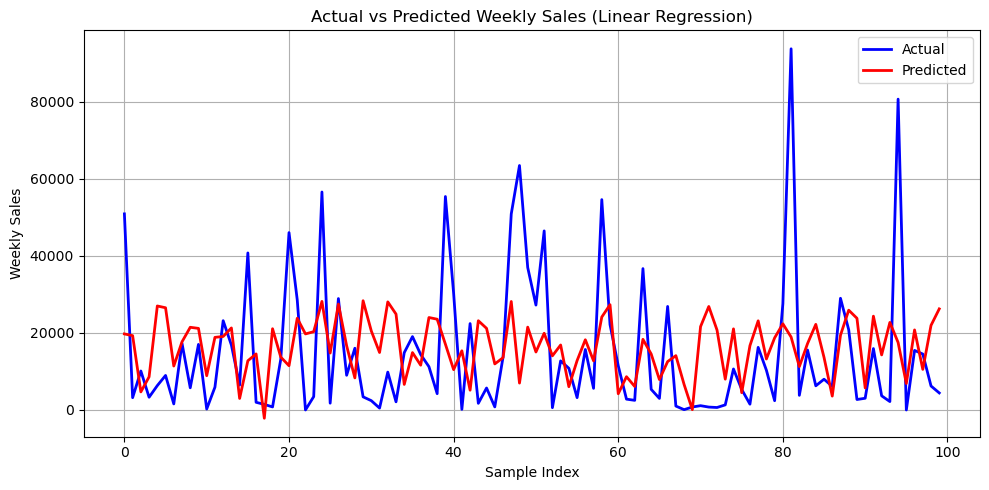

In [270]:
# ✅ Reset indices to align both arrays
y_test_reset = y_test.reset_index(drop=True)
y_pred_reset = pd.Series(y_predict).reset_index(drop=True)

# Plot the first 100 predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test_reset[:100], label='Actual', color='blue', linewidth=2)
plt.plot(y_pred_reset[:100], label='Predicted', color='red', linewidth=2)
plt.title('Actual vs Predicted Weekly Sales (Linear Regression)')
plt.xlabel('Sample Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Random Forest

In [211]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 20, random_state=42, n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20, n_jobs=-1, random_state=42)

In [213]:
rf_pred = rf.predict(X_test)

In [279]:
rf_r2score = r2_score(y_test,rf_pred)
rf_mse = mean_squared_error(y_test,rf_pred)
rf_mae = mean_absolute_error(y_test,rf_pred)

In [281]:
print("R2 score :",rf_r2score)
print("Mean Squared Error :",rf_mse)
print("Mean Absolute Error :",rf_mae)

R2 score : 0.97554500786098
Mean Squared Error : 12752569.03155255
Mean Absolute Error : 1374.5525068138152


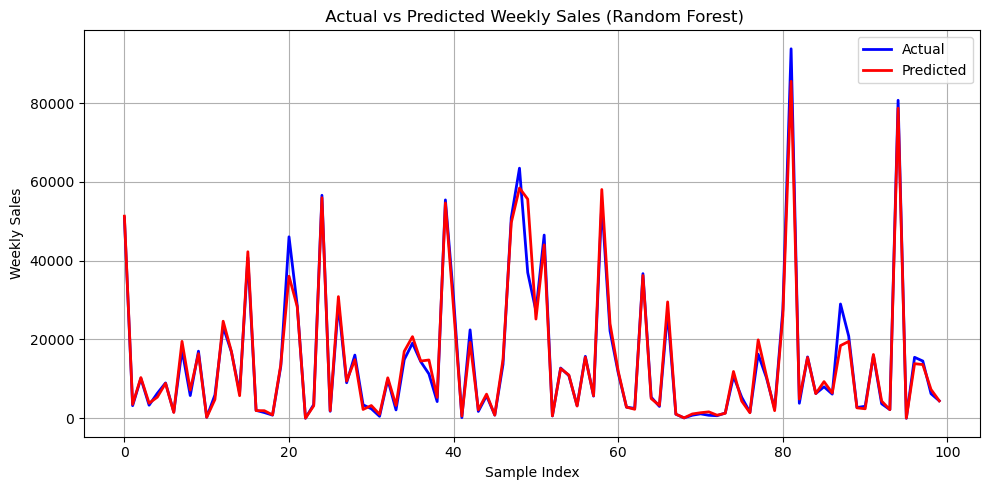

In [266]:
# ✅ Reset indices to align both arrays
y_test_reset = y_test.reset_index(drop=True)
rf_pred_reset = pd.Series(rf_pred).reset_index(drop=True)

# Plot the first 100 predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test_reset[:100], label='Actual', color='blue', linewidth=2)
plt.plot(rf_pred_reset[:100], label='Predicted', color='red', linewidth=2)
plt.title(' Actual vs Predicted Weekly Sales (Random Forest)')
plt.xlabel('Sample Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## XGBoost Algorithm

In [164]:
#!pip install xgboost

In [166]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [168]:
xgb_pred = xgb.predict(X_test)

In [170]:
xgb_pred

array([52198.098 ,  2301.2354, 10842.229 , ..., 13239.043 , 10776.769 ,
       34865.723 ], dtype=float32)

In [283]:
xgb_r2score = r2_score(y_test,xgb_pred)
xgb_mse = mean_squared_error(y_test,xgb_pred)
xgb_mae = mean_absolute_error(y_test,xgb_pred)

In [285]:
print("R2 score :",xgb_r2score)
print("Mean Squared Error :",xgb_mse)
print("Mean Squared Error :",xgb_mae)

R2 score : 0.9265507825479591
Mean Squared Error : 38301636.350810245
Mean Squared Error : 3499.01918207686


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2240\1296325962.py:14: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


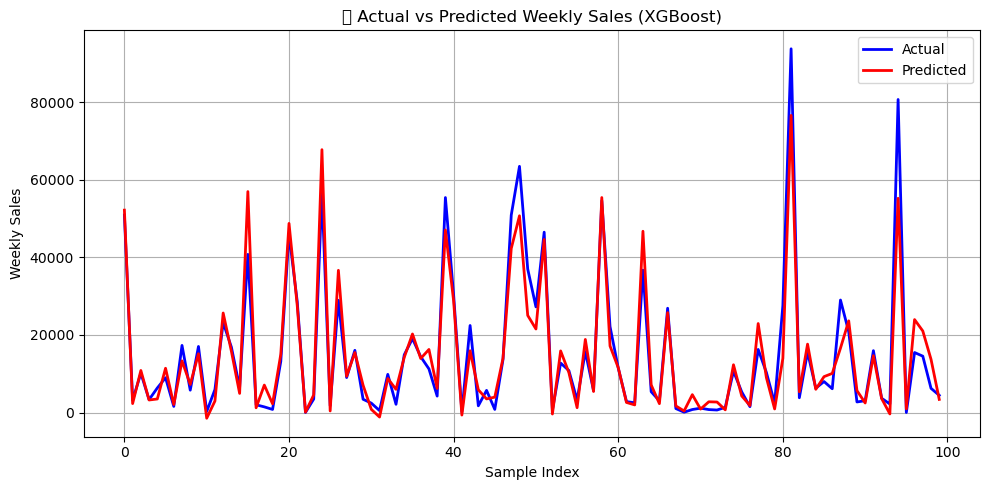

In [264]:
# ✅ Reset indices to align both arrays
y_test_reset = y_test.reset_index(drop=True)
xgb_pred_reset = pd.Series(xgb_pred).reset_index(drop=True)

# Plot the first 100 predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test_reset[:100], label='Actual', color='blue', linewidth=2)
plt.plot(xgb_pred_reset[:100], label='Predicted', color='red', linewidth=2)
plt.title('📈 Actual vs Predicted Weekly Sales (XGBoost)')
plt.xlabel('Sample Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Hyperparameter Tunning

In [176]:
from sklearn.model_selection import RandomizedSearchCV

In [242]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2.0]
}

In [273]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=25,  
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1  # Use all processors
)


In [241]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.3, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 500],
                                        'reg_alpha': [0, 0.01, 0.1],
                                        'reg_lambda': [1, 1.5, 2.0],
                                        'subsample': [0.6, 0.7, 0.8, 1.0]},
                   scoring='r2', verbose=1)

In [246]:
print("Best Parameters:", random_search.best_params_)
print("Best R2 Score on CV:", random_search.best_score_)

Best Parameters: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0.01, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.6}
Best R2 Score on CV: 0.976573137043759


In [248]:
# Use best estimator to predict
best_xgb = random_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

In [293]:
r2 = r2_score(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)

In [295]:
print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

R2 Score: 0.9796
RMSE: 3258.06
MAE: 1650.70


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2240\3134361355.py:14: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


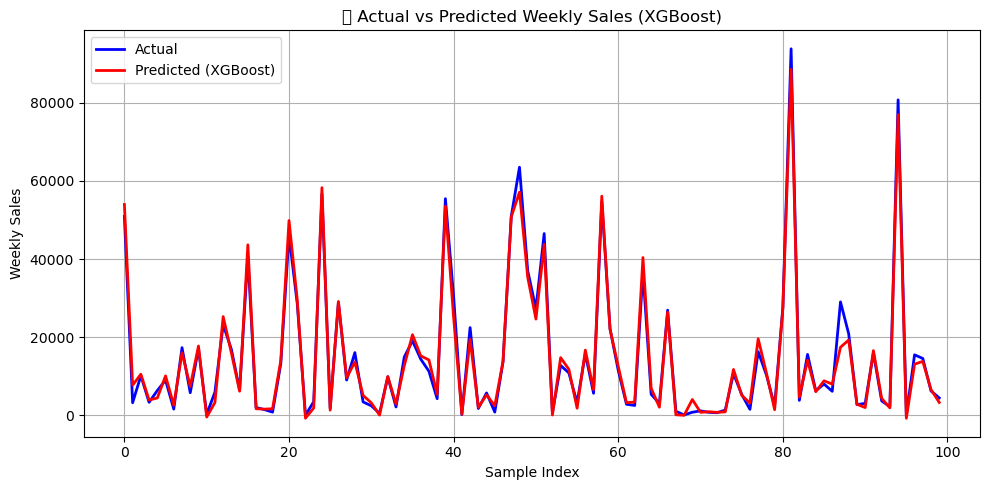

In [297]:
# Reset index for plotting
y_test_reset = y_test.reset_index(drop=True)
y_pred_xgb_reset = pd.Series(y_pred_xgb).reset_index(drop=True)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test_reset[:100], label='Actual', color='blue', linewidth=2)
plt.plot(y_pred_xgb_reset[:100], label='Predicted (XGBoost)', color='red',linewidth=2)
plt.title('📈 Actual vs Predicted Weekly Sales (XGBoost)')
plt.xlabel('Sample Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


import pandas as pd

comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R2 Score': [lr_r2, rf_r2, xgb_r2],
    'RMSE': [lr_rmse, rf_rmse, xgb_rmse],
    'MAE': [lr_mae, rf_mae, xgb_mae]
})

# Round for readability
comparison_df = comparison_df.round(4)
comparison_df


In [301]:
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R2 Score': [lr_r2, rf_r2score, r2],
    'MSE': [lr_mse, rf_mse, mse],
    'MAE': [lr_mae, rf_mae, mae]
})

# Round for readability
comparison_df = comparison_df.round(4)
comparison_df


,Model,R2 Score,MSE,MAE
0,Linear Regression,0.0926,4.731606e+08,14561.9919
1,Random Forest,0.9755,1.275257e+07,1374.5525
2,XGBoost,0.9796,1.061496e+07,1650.6952


## 📊 Interpretation
    🔴 Linear Regression is performing poorly (R² ≈ 0.09). It fails to capture the non-linear patterns in your data.
    🟢 Random Forest and XGBoost both show excellent performance with R² > 0.97, very low errors.
  Random Forest has lower MAE than XGBoost, meaning it gives more consistently close predictions, though XGBoost has slightly better R² and MSE.

In [182]:
import pickle

# Assuming your model is named 'model'
with open('model.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)
